# Build a Credit Score Model

## Import Libraries

In [216]:
import numpy as np #numerical computation
import pandas as pd #data transformation
import matplotlib.pyplot as plt #visualization
import seaborn as sns #visualization

# Feature Engineering
from sklearn.preprocessing import StandardScaler

# Model Training
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn import metrics

# Hyperparameter Fine-tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Save Model
import pickle

## Load Data

In [17]:
df = pd.read_csv('credit-score-data.csv')
df.head(5)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Unnamed: 12
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,NaN
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,NaN
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,NaN
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,NaN
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,NaN


In [18]:
df.drop(['Unnamed: 0','Unnamed: 12'], axis=1, inplace=True)
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


## Inspect data

In [25]:
print("The shape of the data is: ", df.shape)
print('---' * 10)
print(df.info())

The shape of the data is:  (150000, 11)
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 1

# Fix Erroneous Data Types
NumberOfDependents should be of int type and not float.

In [100]:
df['NumberOfDependents'] = df['NumberOfDependents'].astype(int)
df['NumberOfDependents'].dtype

dtype('int64')

## Handling Missing Data

In [27]:
df.isna().sum()/len(df)*100

SeriousDlqin2yrs                         0.000000
RevolvingUtilizationOfUnsecuredLines     0.000000
age                                      0.000000
NumberOfTime30-59DaysPastDueNotWorse     0.000000
DebtRatio                                0.000000
MonthlyIncome                           19.820667
NumberOfOpenCreditLinesAndLoans          0.000000
NumberOfTimes90DaysLate                  0.000000
NumberRealEstateLoansOrLines             0.000000
NumberOfTime60-89DaysPastDueNotWorse     0.000000
NumberOfDependents                       2.616000
dtype: float64

In [40]:
df.dropna(subset=['NumberOfDependents'], inplace=True)
df.isna().sum()/len(df)*100

SeriousDlqin2yrs                         0.000000
RevolvingUtilizationOfUnsecuredLines     0.000000
age                                      0.000000
NumberOfTime30-59DaysPastDueNotWorse     0.000000
DebtRatio                                0.000000
MonthlyIncome                           17.666831
NumberOfOpenCreditLinesAndLoans          0.000000
NumberOfTimes90DaysLate                  0.000000
NumberRealEstateLoansOrLines             0.000000
NumberOfTime60-89DaysPastDueNotWorse     0.000000
NumberOfDependents                       0.000000
dtype: float64

## Impute Missing Values from Monthly Income

In [45]:
df.fillna(df.median(numeric_only=True).round(1), inplace=True)
df.isna().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

## Check for Duplicate  Records

In [54]:
df.duplicated().sum()/len(df)*100

0.3511870533147129

## Drop Duplicate Records

In [57]:
df = df.drop_duplicates()

In [58]:
df.duplicated().sum()/len(df)*100

0.0

In [59]:
# Assess our data after taking care of missing and duplicate values
df.sample(50)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
148187,1,0.429285,25,0,0.209790,1000.0,4,0,0,0,0.0
109227,0,0.003999,23,0,0.225183,1500.0,4,0,0,0,0.0
46670,0,0.048926,65,0,0.159846,11973.0,17,0,1,0,3.0
90419,0,1.000000,39,0,0.043684,5905.0,1,1,0,0,1.0
79304,0,0.869726,59,0,286.000000,5400.0,7,1,0,1,0.0
90540,0,0.036789,51,0,0.221626,7083.0,14,0,1,0,3.0
56499,0,0.954081,46,0,2651.000000,5400.0,16,0,0,0,0.0
59540,0,0.281944,46,0,0.299106,9397.0,10,0,2,0,0.0
87701,0,0.205502,84,0,0.279392,3027.0,11,0,1,0,0.0
49878,0,0.723379,64,0,0.356429,8500.0,13,0,1,0,1.0


## Exploratory Data Analysis

### Descriptive Summary Statistics

In [77]:
# Get Summary Descriptive Statistics
df.describe().T.round(2).style.format('{0:,.1f}')

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,"145,563.0",0.1,0.2,0.0,0.0,0.0,0.0,1.0
RevolvingUtilizationOfUnsecuredLines,"145,563.0",5.9,250.5,0.0,0.0,0.2,0.6,"50,708.0"
age,"145,563.0",52.1,14.6,0.0,41.0,52.0,62.0,107.0
NumberOfTime30-59DaysPastDueNotWorse,"145,563.0",0.4,3.8,0.0,0.0,0.0,0.0,98.0
DebtRatio,"145,563.0",334.6,"1,947.2",0.0,0.2,0.4,0.8,"329,664.0"
MonthlyIncome,"145,563.0","6,452.7","13,083.3",0.0,"3,816.0","5,400.0","7,500.0","3,008,750.0"
NumberOfOpenCreditLinesAndLoans,"145,563.0",8.6,5.1,0.0,5.0,8.0,11.0,58.0
NumberOfTimes90DaysLate,"145,563.0",0.2,3.7,0.0,0.0,0.0,0.0,98.0
NumberRealEstateLoansOrLines,"145,563.0",1.0,1.1,0.0,0.0,1.0,2.0,54.0
NumberOfTime60-89DaysPastDueNotWorse,"145,563.0",0.2,3.7,0.0,0.0,0.0,0.0,98.0


In [97]:
# Check number of unique values for each variable
df.nunique()

SeriousDlqin2yrs                             2
RevolvingUtilizationOfUnsecuredLines    122957
age                                         84
NumberOfTime30-59DaysPastDueNotWorse        16
DebtRatio                               114090
MonthlyIncome                            13594
NumberOfOpenCreditLinesAndLoans             58
NumberOfTimes90DaysLate                     19
NumberRealEstateLoansOrLines                28
NumberOfTime60-89DaysPastDueNotWorse        13
NumberOfDependents                          13
dtype: int64

## Separate continuous from disrete variables

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145563 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      145563 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  145563 non-null  float64
 2   age                                   145563 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  145563 non-null  int64  
 4   DebtRatio                             145563 non-null  float64
 5   MonthlyIncome                         145563 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       145563 non-null  int64  
 7   NumberOfTimes90DaysLate               145563 non-null  int64  
 8   NumberRealEstateLoansOrLines          145563 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  145563 non-null  int64  
 10  NumberOfDependents                    145563 non-null  int64  
dtype

In [104]:
discrete = [col for col in df.columns if df[col].dtype == 'int']
continuous = [col for col in df.columns if df[col].dtype != 'int']

In [113]:
df[continuous]

,RevolvingUtilizationOfUnsecuredLines,DebtRatio,MonthlyIncome
0,0.766127,0.802982,9120.0
1,0.957151,0.121876,2600.0
2,0.658180,0.085113,3042.0
3,0.233810,0.036050,3300.0
4,0.907239,0.024926,63588.0
...,...,...,...
149995,0.040674,0.225131,2100.0
149996,0.299745,0.716562,5584.0
149997,0.246044,3870.000000,5400.0
149998,0.000000,0.000000,5716.0


### Check Distribution of Data
#### Plot Histograms

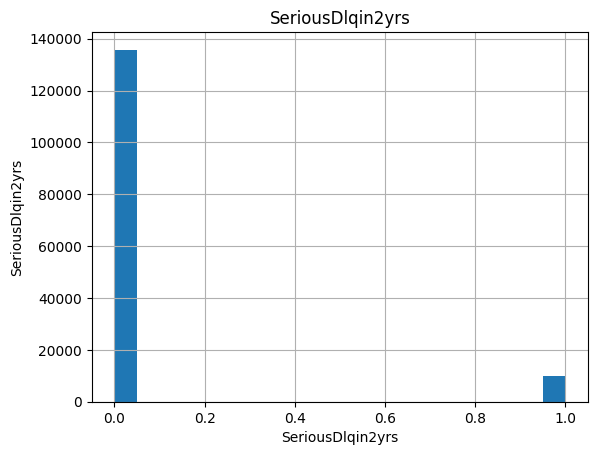

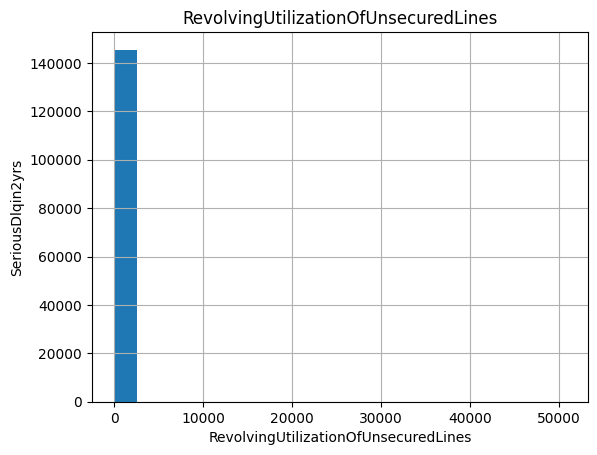

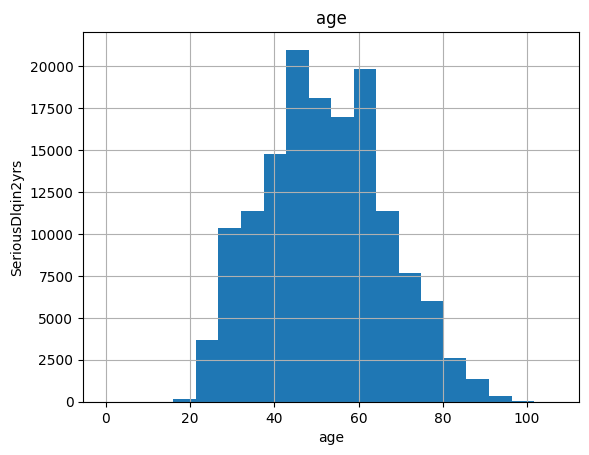

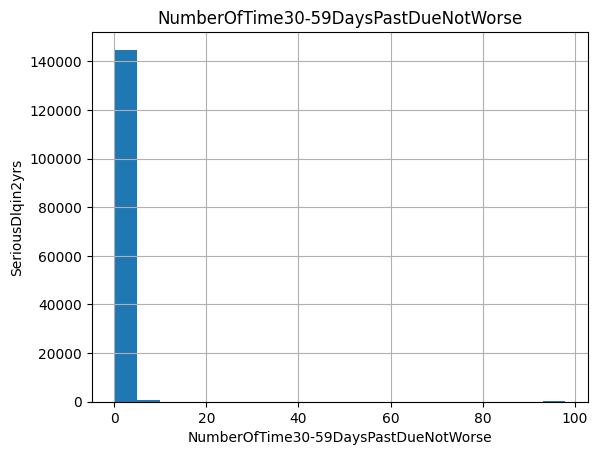

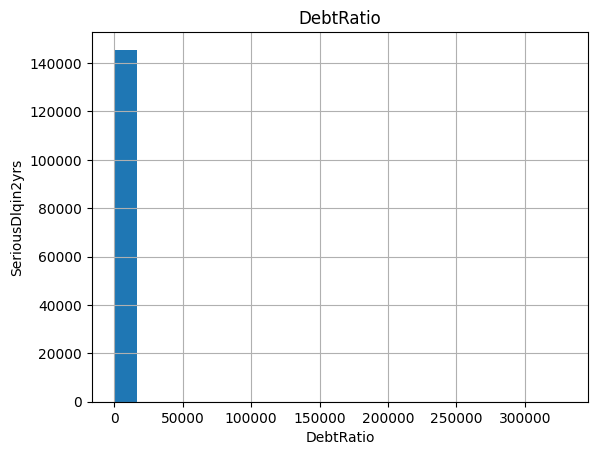

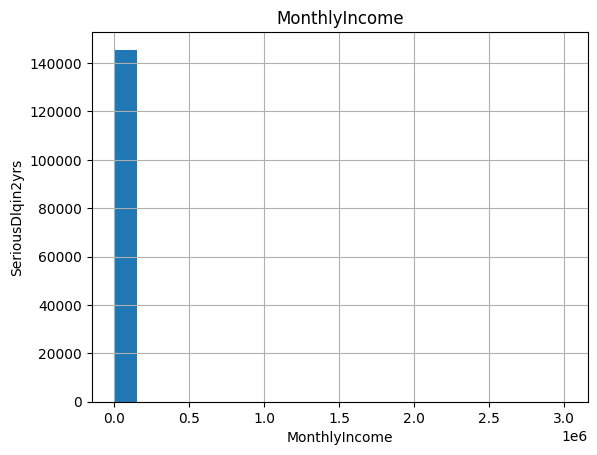

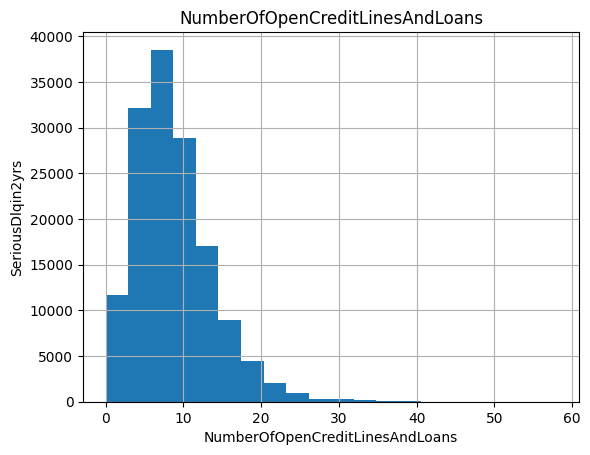

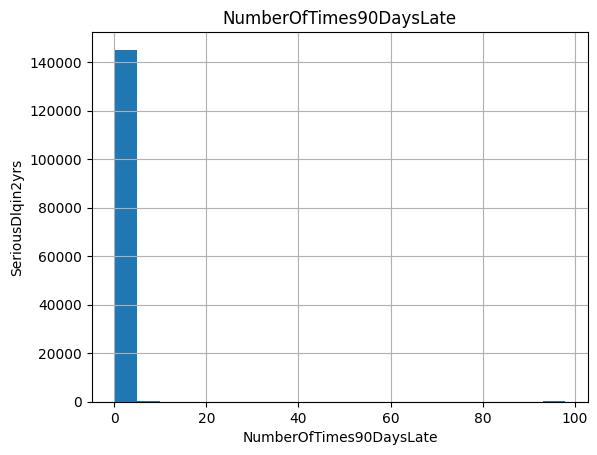

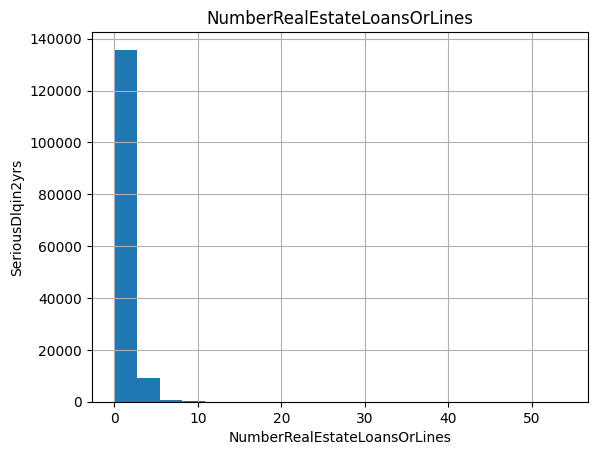

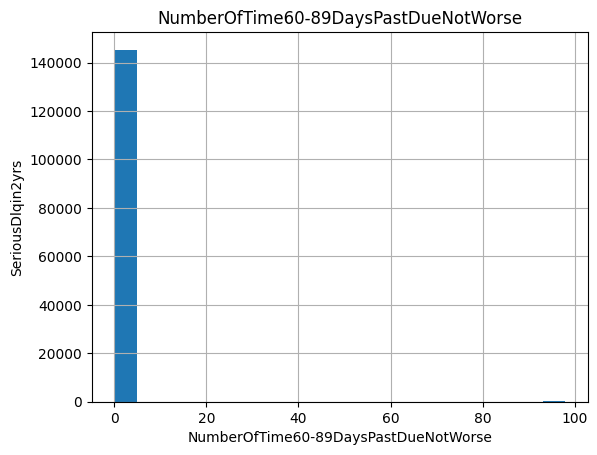

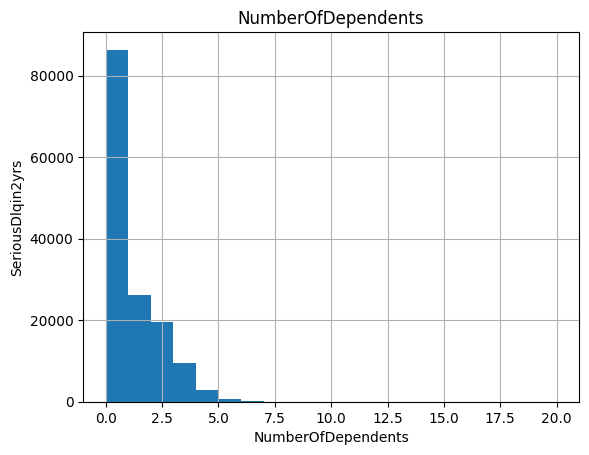

In [119]:
# Create function that plots histograms for each variable
def histogram_plot(df, var):
    """
    This function creates histogram plots for numerical features.
    """
    df = df.copy()
    df[var].hist(bins=20)
    plt.ylabel('SeriousDlqin2yrs')
    plt.xlabel(var)
    plt.title(var)
    plt.show()
    
for var in df:
    histogram_plot(df, var)

### Check Relationship between Features and Target
#### Plot Scatterplots

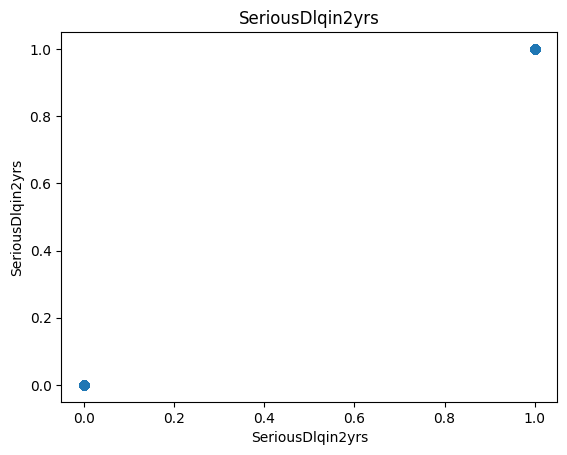

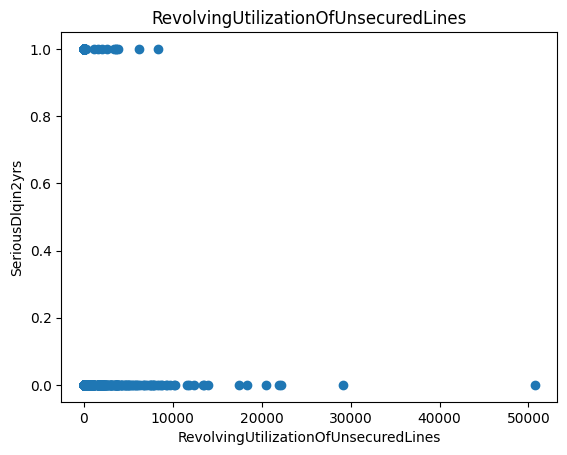

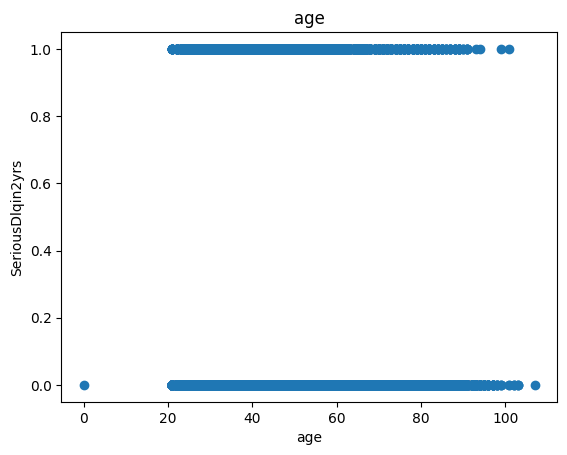

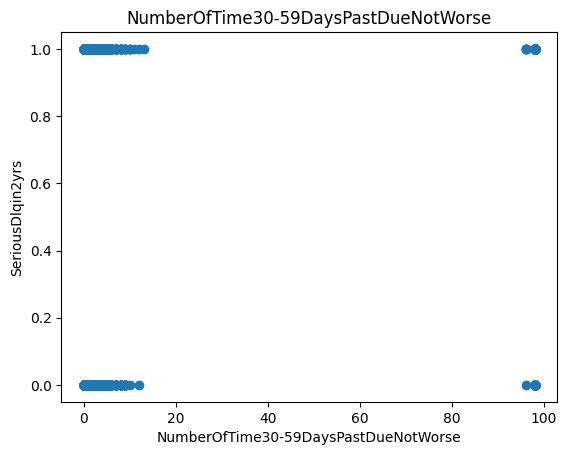

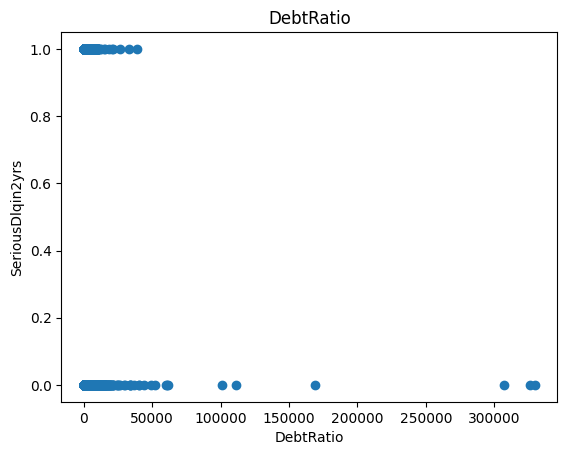

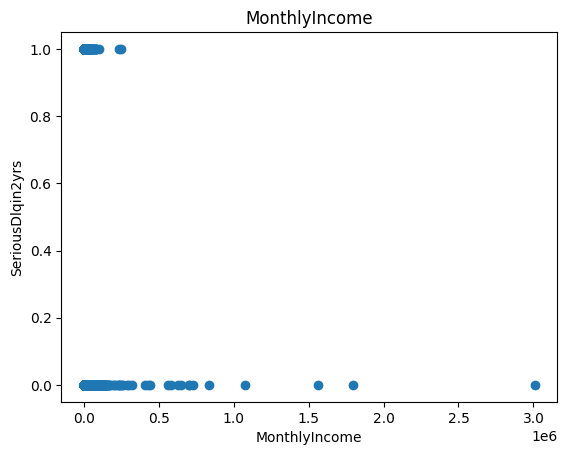

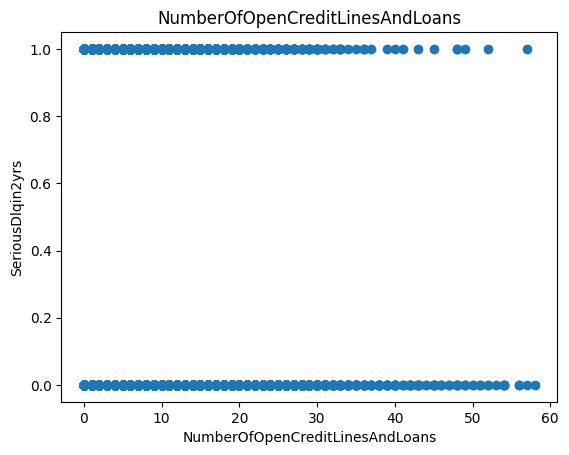

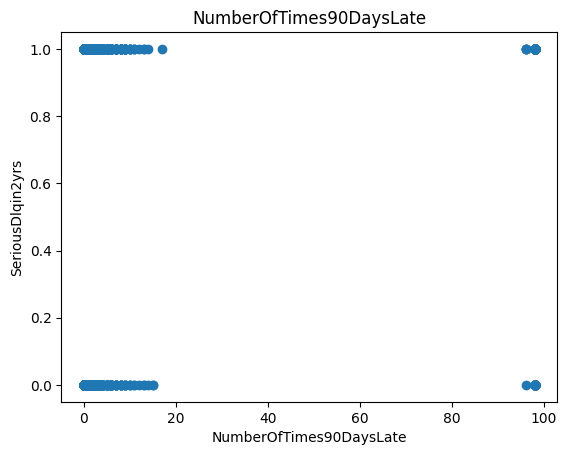

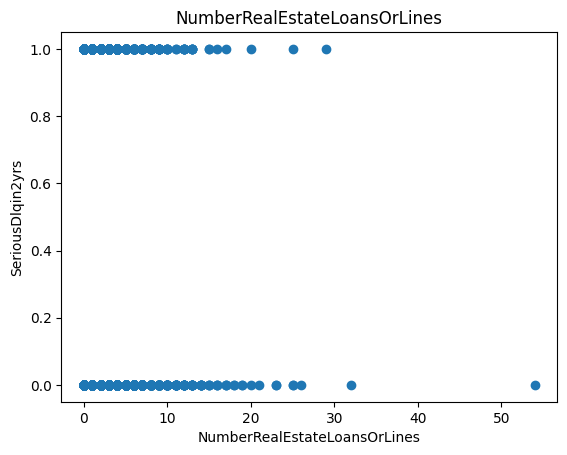

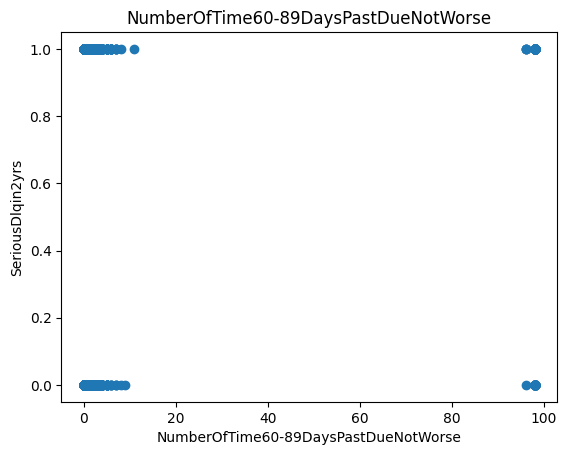

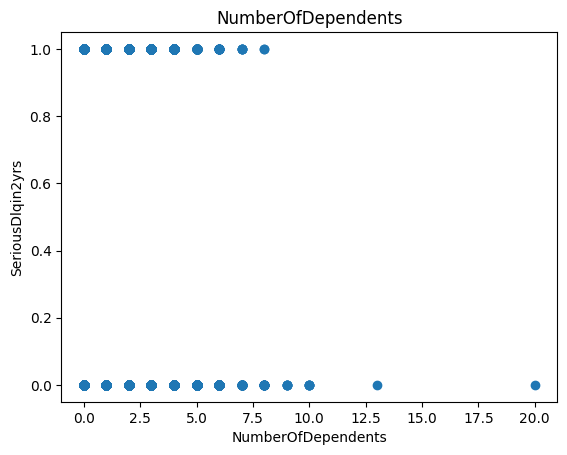

In [120]:
# Create function that plots bivariate relationship betweeen each predictor variable and target.

def scatterplot(df, var):
    """
    This function illustrates bivariate relationships using scatterplot
    """
    df = df.copy()
    plt.scatter(df[var], df['SeriousDlqin2yrs'])
    plt.ylabel('SeriousDlqin2yrs')
    plt.xlabel(var)
    plt.title(var)
    plt.show()
    
for var in df:
    scatterplot(df, var)

As we can see, because our target variable is binary (that is takes a value of either 0 or 1), a scatterplot is not a really helpful illustration of the bivariate relationships.

### Check Correlation among Features and Target
#### Plot Heatmap

<AxesSubplot:>

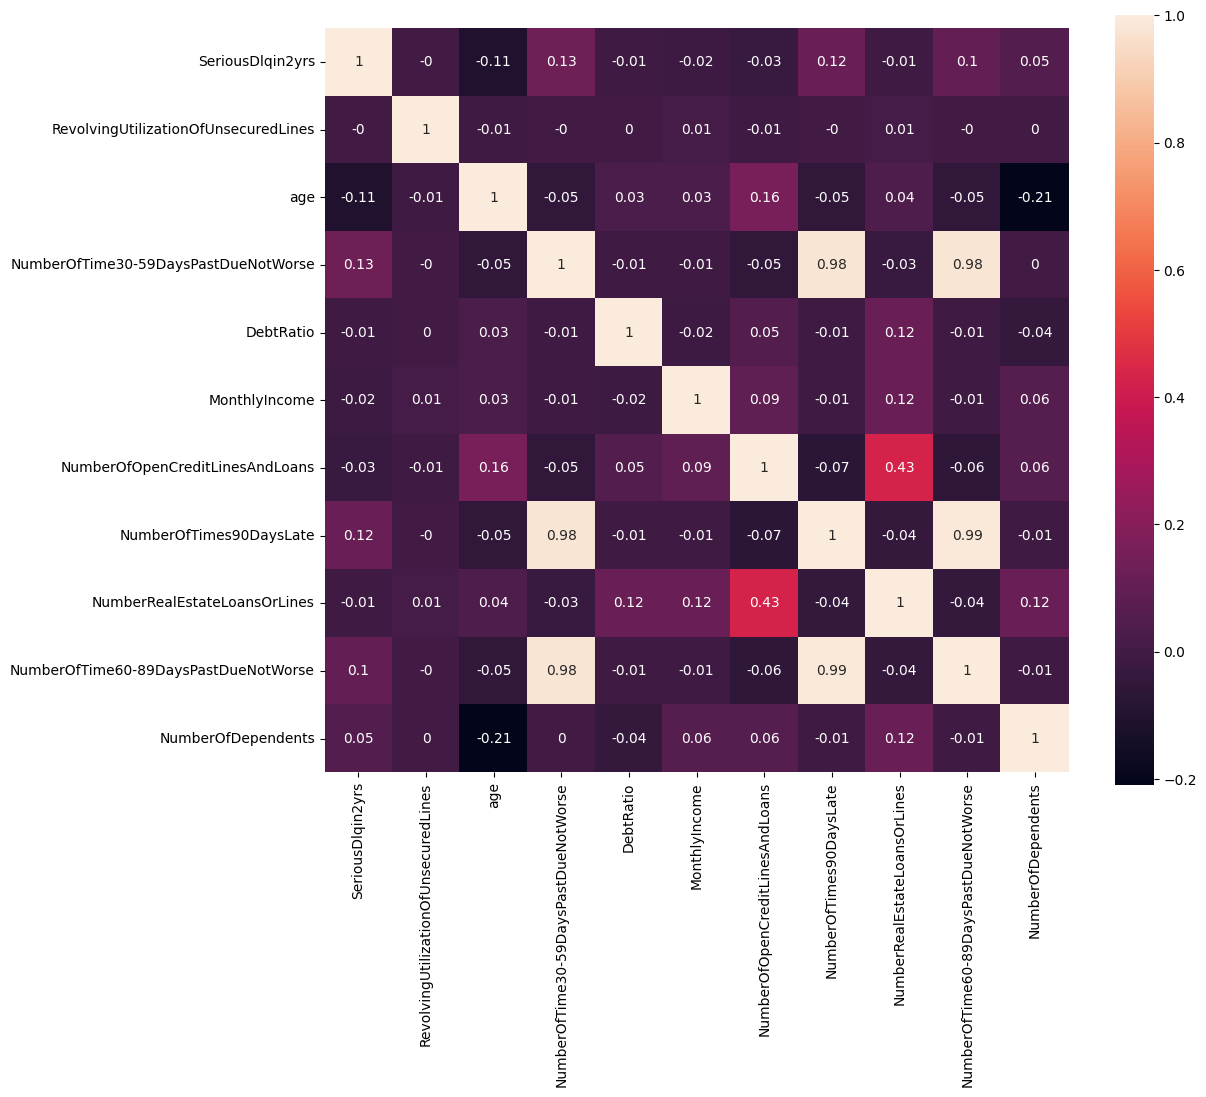

In [91]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr().round(2), annot=True, square=True)

### Check for Outliers
#### Plot Violinpots

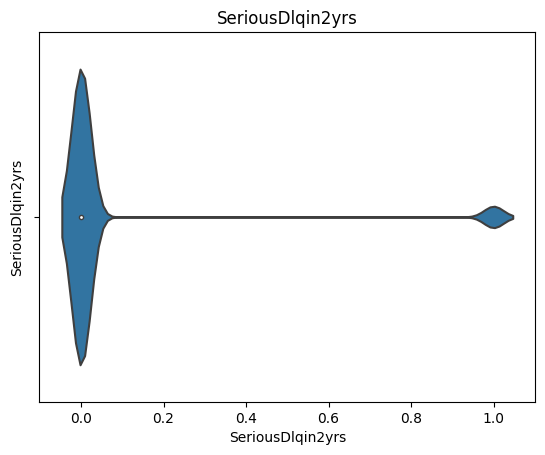

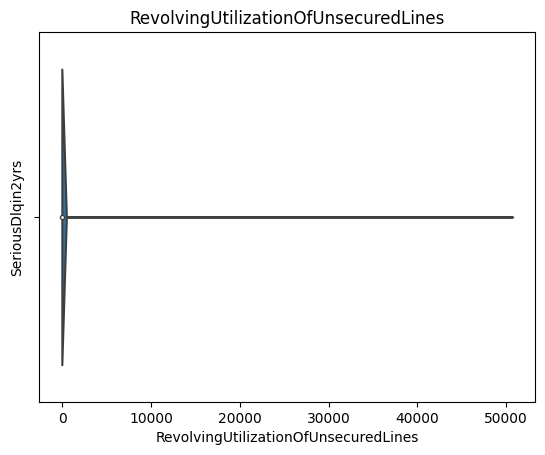

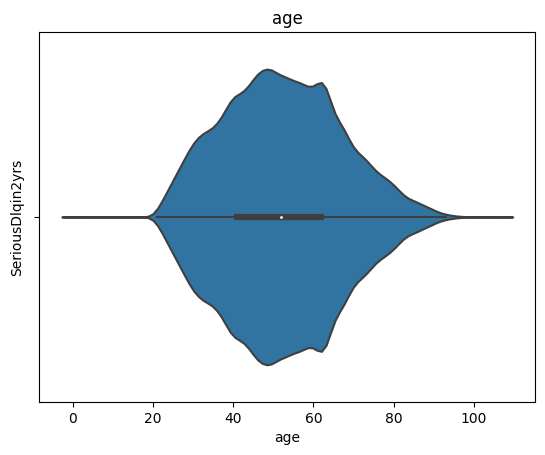

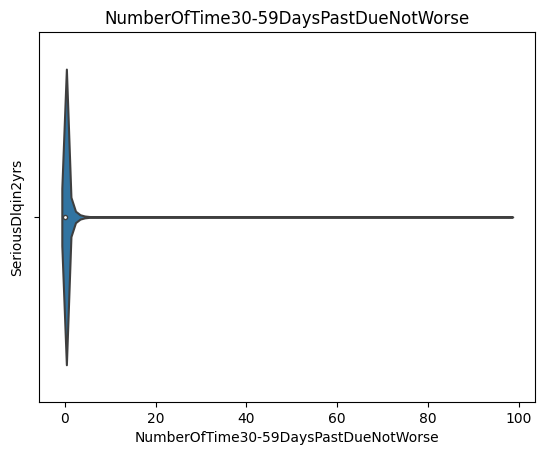

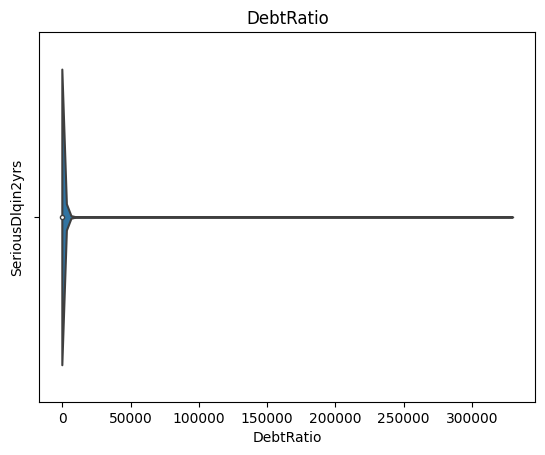

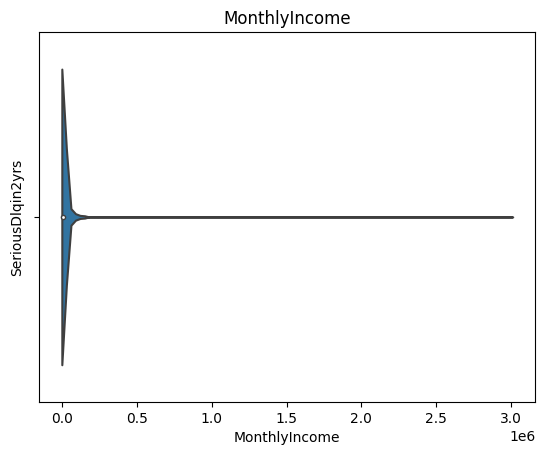

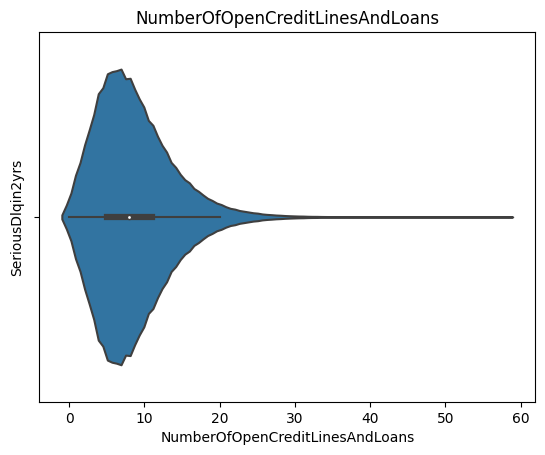

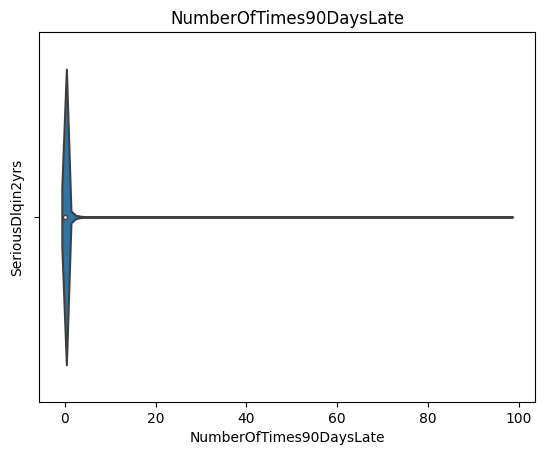

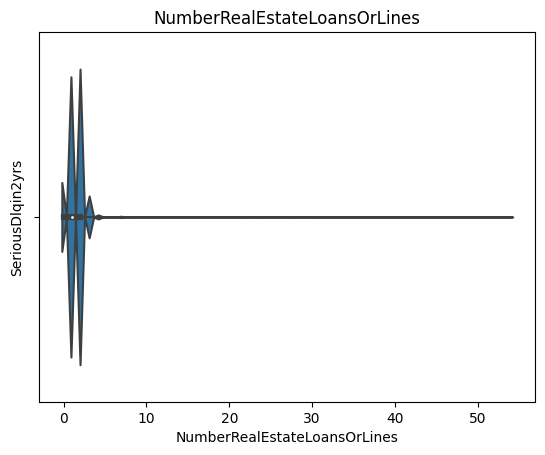

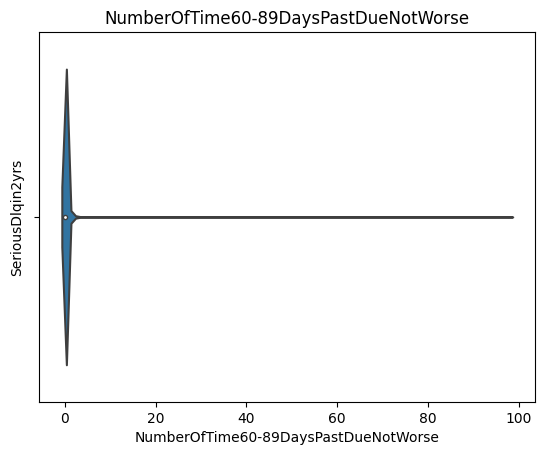

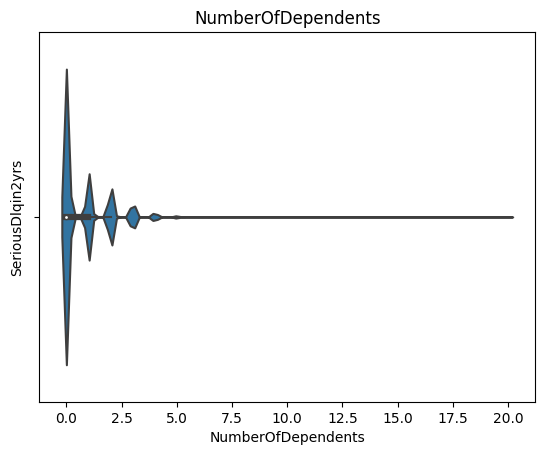

In [126]:
# Create function that identifies outliers in variables
def violin_plot(df, var):
    """
    This function illustrates bivariate relationships using scatterplot
    """
    df = df.copy()
    sns.violinplot(x = df[var])
    plt.ylabel('SeriousDlqin2yrs')
    plt.xlabel(var)
    plt.title(var)
    plt.show()
    
for var in df:
    violin_plot(df, var)

# Feature Engineering

## Normalize numerical features

In [142]:
# Instantiate an object from StandardScaler class
sc = StandardScaler()

In [146]:
# Create function that normalizes numerical features

def scale_columns(df, columns):
    scaler = StandardScaler()
    for col in columns:
        if col in df.columns:
            df[col] = scaler.fit_transform(df[[col]])
        else:
            print(f"Column {col} not found in DataFrame.")
    return df

In [152]:
df.dtypes

SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                        int64
dtype: object

In [154]:
scaled_df = scale_columns(df, 
                          ['RevolvingUtilizationOfUnsecuredLines',
                           'age',
                           'DebtRatio', 
                           'MonthlyIncome'])

In [157]:
scaled_df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,-0.020659,-0.488117,2,-0.171396,0.203874,13,0,6,0,2
1,0,-0.019896,-0.831345,0,-0.171745,-0.294472,4,0,0,0,1
2,0,-0.021090,-0.968636,1,-0.171764,-0.260689,2,1,0,0,0
3,0,-0.022784,-1.517800,0,-0.171789,-0.240969,5,0,0,0,0
4,0,-0.020096,-0.213536,1,-0.171795,4.367055,7,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
149995,0,-0.023555,1.502601,0,-0.171692,-0.332689,4,0,1,0,0
149996,0,-0.022521,-0.556763,0,-0.171440,-0.066395,4,0,1,0,2
149997,0,-0.022735,0.404274,0,1.815639,-0.080459,18,0,1,0,0
149998,0,-0.023717,-1.517800,0,-0.171808,-0.056306,4,0,0,0,0


# Model Training Prep

In [158]:
# Split data into X and y variables

X = df.loc[:, df.columns != 'SeriousDlqin2yrs']
y = df['SeriousDlqin2yrs']

In [159]:
# Split data into training data and test data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=101
)

In [160]:
X_train.shape, X_test.shape

((116450, 10), (29113, 10))

In [161]:
y_train.shape, y_test.shape

((116450,), (29113,))

In [162]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,-0.020659,-0.488117,2,-0.171396,0.203874,13,0,6,0,2
1,0,-0.019896,-0.831345,0,-0.171745,-0.294472,4,0,0,0,1
2,0,-0.021090,-0.968636,1,-0.171764,-0.260689,2,1,0,0,0
3,0,-0.022784,-1.517800,0,-0.171789,-0.240969,5,0,0,0,0
4,0,-0.020096,-0.213536,1,-0.171795,4.367055,7,0,1,0,0


# Model Selection and Training

## Baseline model: Logistic Regression

In [164]:
# Instantiate an object of the LogisticRegression class
lr = LogisticRegression()

In [168]:
# Fit Model
lr.fit(X_train, y_train)

LogisticRegression()

In [183]:
# Score Model
lr.score(X_train, y_train).round(2)

0.93

In [169]:
# Generate Predictions
y_pred = lr.predict(X_test)

### Logistic Regression Model Evaluation

In [177]:
# Plot confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix

array([[27068,    60],
       [ 1895,    90]])

In [180]:
# Plot classification report
classification_report = metrics.classification_report(y_test, y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.93      1.00      0.97     27128
           1       0.60      0.05      0.08      1985

    accuracy                           0.93     29113
   macro avg       0.77      0.52      0.52     29113
weighted avg       0.91      0.93      0.91     29113



## Model #2: Random Forest Classification

### Random Forest Classification Model Evaluation